# Processing the Collected Data

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_DataSet.csv")

## Organizing Data

In [3]:
df.head()

,Unnamed: 0,reviews,Rota,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
0,0,✅ Trip Verified | My daughter and I were deni...,Madrid to Vancouver via London,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1
1,1,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8
2,2,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1
3,3,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1
4,4,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1


In [4]:
df.columns = ["Index", "Approval_Status_and_Review", "Route", "Seat_Type", "Seat_Comfort", "Cabin_Staff_Service", "Food_and_Beverages", "Inflight_Entertainment", "Ground_Service", "Wifi_and_Connectivity", "Value_for_Money", "Score"]

In [5]:
df

,Index,Approval_Status_and_Review,Route,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
0,0,✅ Trip Verified | My daughter and I were deni...,Madrid to Vancouver via London,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1
1,1,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8
2,2,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1
3,3,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1
4,4,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,✅ Trip Verified | London to Lyon. The flight ...,London to Lyon,Economy Class,2.0,1.0,NaN,NaN,1.0,NaN,1,1
996,996,✅ Trip Verified | London to Boston. I was sea...,London to Boston,Economy Class,3.0,5.0,4.0,4.0,4.0,1.0,5,8
997,997,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London,Business Class,3.0,5.0,2.0,NaN,1.0,NaN,3,5
998,998,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London,Economy Class,4.0,4.0,NaN,NaN,1.0,NaN,3,1


In [6]:
df[['Approval_Status', 'Review']] = df['Approval_Status_and_Review'].str.split('|', expand=True)

In [7]:
df = df.drop(columns=['Approval_Status_and_Review'])

In [8]:
df = df.drop(columns=['Index'])

In [9]:
df.head()

,Route,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review
0,Madrid to Vancouver via London,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,✅ Trip Verified,My daughter and I were denied boarding on ou...
1,London to Santiago,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,✅ Trip Verified,Despite boarding being the usual free for all...
2,London Heathrow to Faro,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202..."
3,Kuwait to Lisbon via London,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a..."
4,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,✅ Trip Verified,4/4 flights we booked this holiday were dela...


In [10]:
df["Approval_Status"] = df["Approval_Status"].str.replace("✅", "").str.strip()

In [11]:
df

,Route,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review
0,Madrid to Vancouver via London,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,My daughter and I were denied boarding on ou...
1,London to Santiago,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,Trip Verified,Despite boarding being the usual free for all...
2,London Heathrow to Faro,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202..."
3,Kuwait to Lisbon via London,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a..."
4,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,London to Lyon,Economy Class,2.0,1.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,London to Lyon. The flight has 1h 30 delay f...
996,London to Boston,Economy Class,3.0,5.0,4.0,4.0,4.0,1.0,5,8,Trip Verified,London to Boston. I was seated next to a cus...
997,Stockholm to London,Business Class,3.0,5.0,2.0,NaN,1.0,NaN,3,5,Trip Verified,Stockholm to London. Standard configuration o...
998,Amsterdam to London,Economy Class,4.0,4.0,NaN,NaN,1.0,NaN,3,1,Trip Verified,Amsterdam to London arrived 33 minutes late ...


## Data Analysis 1 - Review Analysis - Good/Bad/Neutral Discrimination

In [12]:
from textblob import TextBlob

In [13]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.0:
        return "Good"
    elif analysis.sentiment.polarity < 0.0:
        return "Bad"
    else:
        return "Neutral"

In [14]:
df["Review_Type"] = df["Review"].apply(sentiment_analysis)

In [15]:
df

,Route,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review,Review_Type
0,Madrid to Vancouver via London,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good
1,London to Santiago,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,Trip Verified,Despite boarding being the usual free for all...,Good
2,London Heathrow to Faro,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad
3,Kuwait to Lisbon via London,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad
4,London to Munich,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,London to Lyon,Economy Class,2.0,1.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,London to Lyon. The flight has 1h 30 delay f...,Bad
996,London to Boston,Economy Class,3.0,5.0,4.0,4.0,4.0,1.0,5,8,Trip Verified,London to Boston. I was seated next to a cus...,Good
997,Stockholm to London,Business Class,3.0,5.0,2.0,NaN,1.0,NaN,3,5,Trip Verified,Stockholm to London. Standard configuration o...,Good
998,Amsterdam to London,Economy Class,4.0,4.0,NaN,NaN,1.0,NaN,3,1,Trip Verified,Amsterdam to London arrived 33 minutes late ...,Good


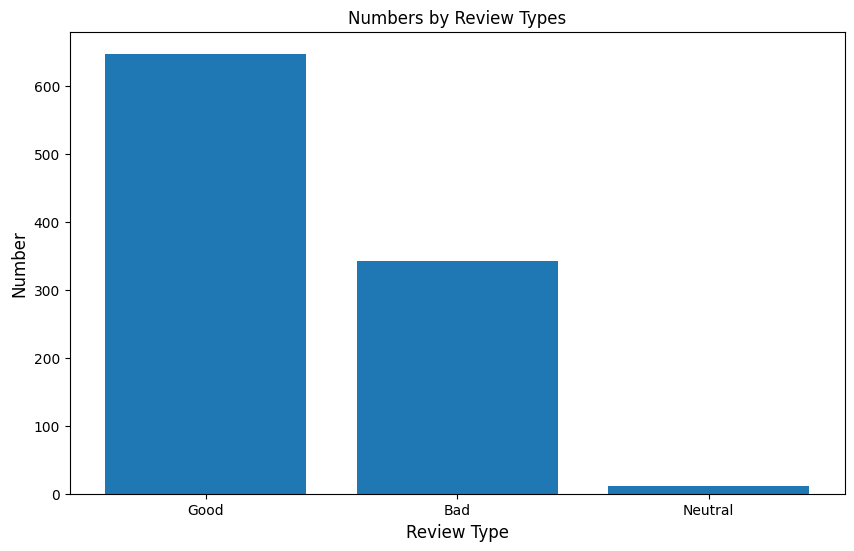

In [16]:
review_count = df['Review_Type'].value_counts()

# Bar grafiğini oluşturun
plt.figure(figsize=(10,6))
plt.bar(review_count.index, review_count.values)

plt.title('Numbers by Review Types')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Review Type', fontsize=12)

plt.show()

## Data Analysis 2 - Route Analysis - From/To

In [17]:
# Find rows in the 'Route' column that do not contain 'to'
invalid_rows = df['Route'].str.contains(' to ') == False

print(df[invalid_rows])

                 Route      Seat_Type  Seat_Comfort  Cabin_Staff_Service  \
167  London Singapore   Economy Class           3.0                  5.0   

     Food_and_Beverages  Inflight_Entertainment  Ground_Service  \
167                 5.0                     4.0             5.0   

     Wifi_and_Connectivity  Value_for_Money  Score Approval_Status  \
167                    NaN                4      8   Trip Verified   

                                                Review Review_Type  
167    Although it was a bit uncomfortable flight i...        Good  


In [18]:
df.isna().sum().sum()

1627

In [19]:
df['Route'] = df['Route'].str.replace('London Singapore', 'London to Singapore')

In [20]:
df['Route'].fillna('Unknown to Unknown', inplace=True)

In [21]:
df[df['Route'].str.count(' to ') > 1]

,Route,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review,Review_Type
639,doha to londonDoha to London,Economy Class,5.0,5.0,4.0,4.0,5.0,NaN,5,9,Trip Verified,"Doha to London. Surprisingly good flight, on...",Good
939,Bucharest to London Heathrow to Los Angeles,Economy Class,1.0,5.0,2.0,1.0,5.0,1.0,1,2,Trip Verified,I understand completely why there is air rage...,Good


In [22]:
df['Route'] = df['Route'].str.replace('doha to londonDoha to London', 'Doha to London')
df['Route'] = df['Route'].str.replace('Bucharest to London Heathrow to Los Angeles', 'Bucharest to Los Angeles')

In [23]:
df[['From', 'To']] = df['Route'].str.split(' to ', expand=True)

In [24]:
df = df.drop(columns=['Route'])

In [25]:
df

,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score,Approval_Status,Review,Review_Type,From,To
0,Business Class,3.0,3.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,My daughter and I were denied boarding on ou...,Good,Madrid,Vancouver via London
1,Business Class,3.0,5.0,4.0,NaN,2.0,NaN,5,8,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago
2,Business Class,NaN,NaN,NaN,NaN,1.0,NaN,1,1,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London Heathrow,Faro
3,Economy Class,3.0,1.0,1.0,1.0,3.0,1.0,3,1,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon via London
4,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,1,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Economy Class,2.0,1.0,NaN,NaN,1.0,NaN,1,1,Trip Verified,London to Lyon. The flight has 1h 30 delay f...,Bad,London,Lyon
996,Economy Class,3.0,5.0,4.0,4.0,4.0,1.0,5,8,Trip Verified,London to Boston. I was seated next to a cus...,Good,London,Boston
997,Business Class,3.0,5.0,2.0,NaN,1.0,NaN,3,5,Trip Verified,Stockholm to London. Standard configuration o...,Good,Stockholm,London
998,Economy Class,4.0,4.0,NaN,NaN,1.0,NaN,3,1,Trip Verified,Amsterdam to London arrived 33 minutes late ...,Good,Amsterdam,London


### 'Via' Cleaning - Transfer Segregation

In [26]:
invalid_rows_from = df['From'].str.contains('via')

print(df[invalid_rows_from])

          Seat_Type  Seat_Comfort  Cabin_Staff_Service  Food_and_Beverages  \
82  Premium Economy           4.0                  4.0                 1.0   

    Inflight_Entertainment  Ground_Service  Wifi_and_Connectivity  \
82                     NaN             5.0                    NaN   

    Value_for_Money  Score Approval_Status  \
82                1      4   Trip Verified   

                                               Review Review_Type  \
82   My husband and I booked seats within our prem...         Bad   

                    From                To  
82  Sydney via Singapore  London Heathrow   


In [27]:
invalid_rows_to = df['To'].str.contains('via')

print(df[invalid_rows_to])

           Seat_Type  Seat_Comfort  Cabin_Staff_Service  Food_and_Beverages  \
0     Business Class           3.0                  3.0                 NaN   
3      Economy Class           3.0                  1.0                 1.0   
11     Economy Class           1.0                  3.0                 NaN   
12   Premium Economy           3.0                  1.0                 1.0   
20     Economy Class           1.0                  1.0                 NaN   
..               ...           ...                  ...                 ...   
983    Economy Class           NaN                  NaN                 NaN   
986   Business Class           5.0                  5.0                 5.0   
988    Economy Class           2.0                  4.0                 4.0   
993    Economy Class           3.0                  1.0                 1.0   
994  Premium Economy           2.0                  3.0                 2.0   

     Inflight_Entertainment  Ground_Service  Wifi_a

In [28]:
# Separate 'From' and 'To' columns by the word 'via'
df.loc[invalid_rows_from, 'Transfer'] = df.loc[invalid_rows_from, 'From'].str.split('via').str[1]
df.loc[invalid_rows_from, 'From'] = df.loc[invalid_rows_from, 'From'].str.split('via').str[0]

df.loc[invalid_rows_to, 'Transfer'] = df.loc[invalid_rows_to, 'To'].str.split('via').str[1]
df.loc[invalid_rows_to, 'To'] = df.loc[invalid_rows_to, 'To'].str.split('via').str[0]

In [29]:
df["Transfer"].isna().sum()

816

### Keep Cleaning

In [30]:
print("Most common 'From' values:")
print(df['From'].value_counts().head(10))

print("\nMost common 'To' values:")
print(df['To'].value_counts().head(10))

Most common 'From' values:
From
London             281
London Heathrow     78
Gatwick             37
Heathrow            23
Johannesburg        19
Vancouver           15
Los Angeles         13
New York            13
Cape Town           12
San Francisco       12
Name: count, dtype: int64

Most common 'To' values:
To
London             219
London Heathrow     68
Gatwick             23
London              23
Cape Town           16
Malaga              13
Heathrow            11
Johannesburg        11
Glasgow             10
London City         10
Name: count, dtype: int64


In [31]:
# Remove spaces at the beginning and end of data in columns
df['From'] = df['From'].str.strip()
df['To'] = df['To'].str.strip()
df['Transfer'] = df['Transfer'].str.strip()

### Organizing Cities
We do this to correct cities/airports that are written differently even though they are written for the same purpose.

In [32]:
df['From'] = df['From'].str.replace('London City', 'London')
df['From'] = df['From'].str.replace('LondonCity', 'London')
df['From'] = df['From'].str.replace('London Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('LondonLondon', 'London')
df['From'] = df['From'].str.replace('London Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('LondonGatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('London Heaathrow', 'London/Heathrow')

In [33]:
df['To'] = df['To'].str.replace('London City', 'London')
df['To'] = df['To'].str.replace('LondonCity', 'London')
df['To'] = df['To'].str.replace('London Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('LondonLondon', 'London')
df['To'] = df['To'].str.replace('London Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('LondonGatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('London Heaathrow', 'London/Heathrow')

In [34]:
df['Transfer'] = df['Transfer'].str.replace('London City', 'London')
df['Transfer'] = df['Transfer'].str.replace('London,', 'London')
df['Transfer'] = df['Transfer'].str.replace('LondonCity', 'London')
df['Transfer'] = df['Transfer'].str.replace('London Heathrow', 'London/Heathrow')
df['Transfer'] = df['Transfer'].str.replace('Heathrow', 'London/Heathrow')
df['Transfer'] = df['Transfer'].str.replace('LondonLondon', 'London')
df['Transfer'] = df['Transfer'].str.replace('London Gatwick', 'London/Gatwick')
df['Transfer'] = df['Transfer'].str.replace('LondonGatwick', 'London/Gatwick')
df['Transfer'] = df['Transfer'].str.replace('Gatwick', 'London/Gatwick')
df['Transfer'] = df['Transfer'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['Transfer'] = df['Transfer'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['Transfer'] = df['Transfer'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['Transfer'] = df['Transfer'].str.replace('London Heaathrow', 'London/Heathrow')

In [35]:
print("Most common 'From' values:")
print(df['From'].value_counts())

Most common 'From' values:
From
London               288
London/Heathrow      102
London/Gatwick        48
Johannesburg          19
Vancouver             15
                    ... 
Washington Dulles      1
Preveza                1
Aberdeen               1
Ottawa                 1
Nassau                 1
Name: count, Length: 165, dtype: int64


In [36]:
print("\nMost common 'To' values:")
print(df['To'].value_counts())


Most common 'To' values:
To
London               253
London/Heathrow       87
London/Gatwick        31
Los Angeles           17
Cape Town             16
                    ... 
Corfu                  1
Moscow Domodedovo      1
Catania                1
Tirana London          1
San Fransisco          1
Name: count, Length: 191, dtype: int64


In [37]:
print("Most common 'Transfer' values:")
print(df['Transfer'].value_counts())

Most common 'Transfer' values:
Transfer
London                            131
London/Heathrow                    24
Singapore                          12
London/Gatwick                      3
Chicago                             1
Johannesburg / London/Heathrow      1
Barcelona                           1
Singapore / London                  1
Copenhagen                          1
London / Singapore                  1
London / Seattle                    1
Miami / Madrid                      1
Dublin                              1
Chicago / London                    1
Toronto / London                    1
Los Angeles                         1
Doha                                1
Geneva                              1
Name: count, dtype: int64


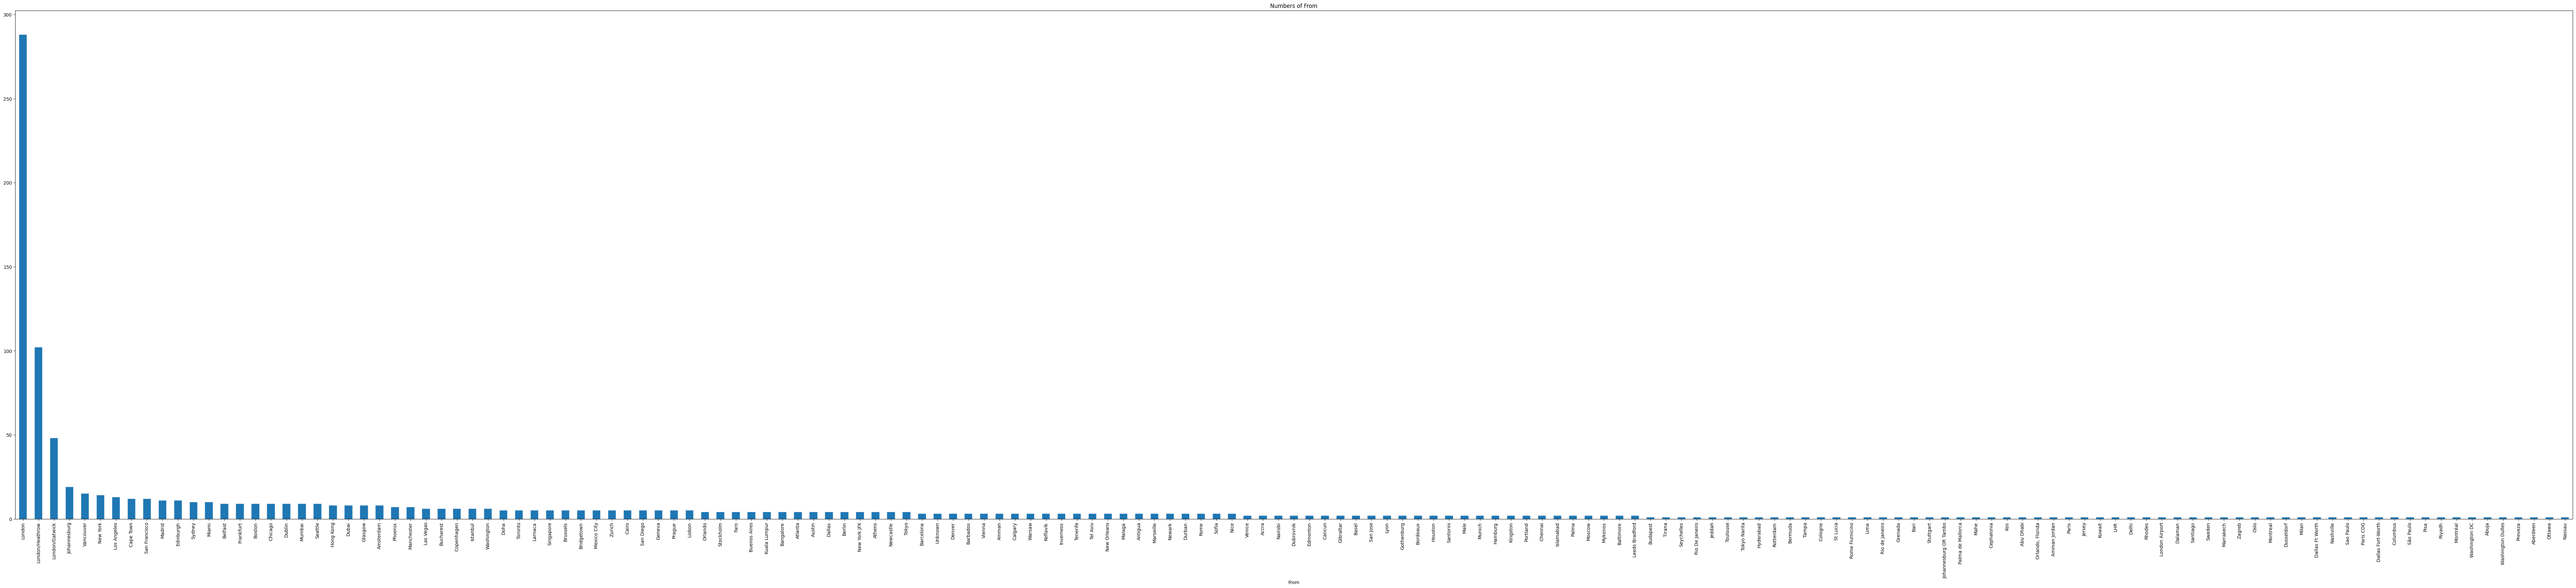

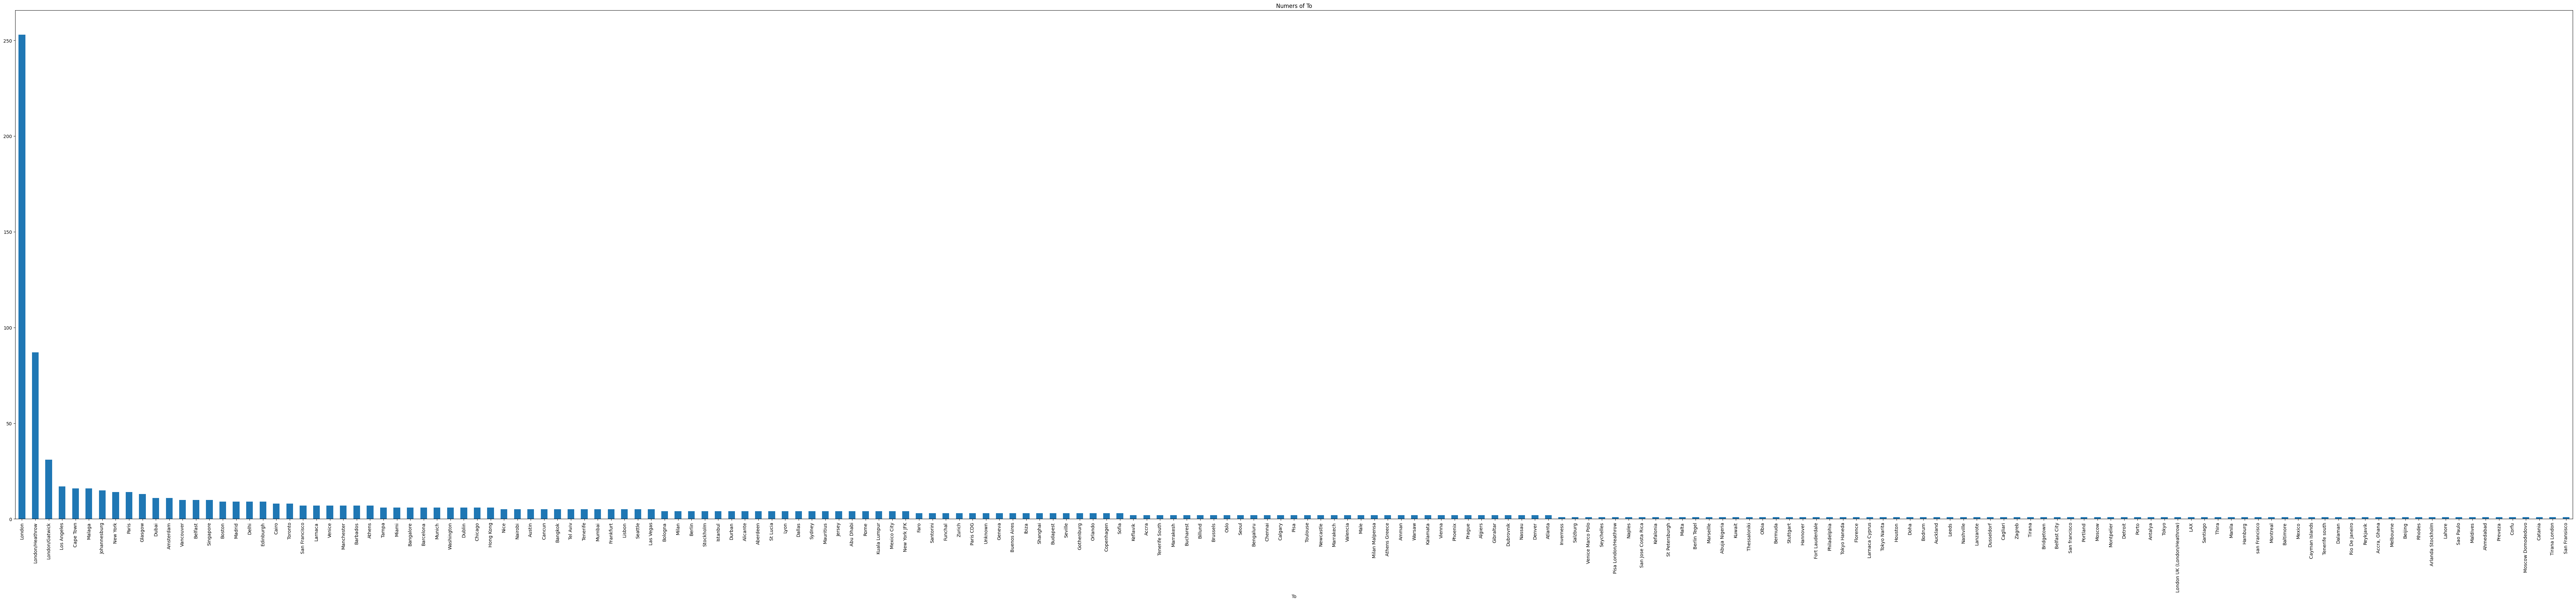

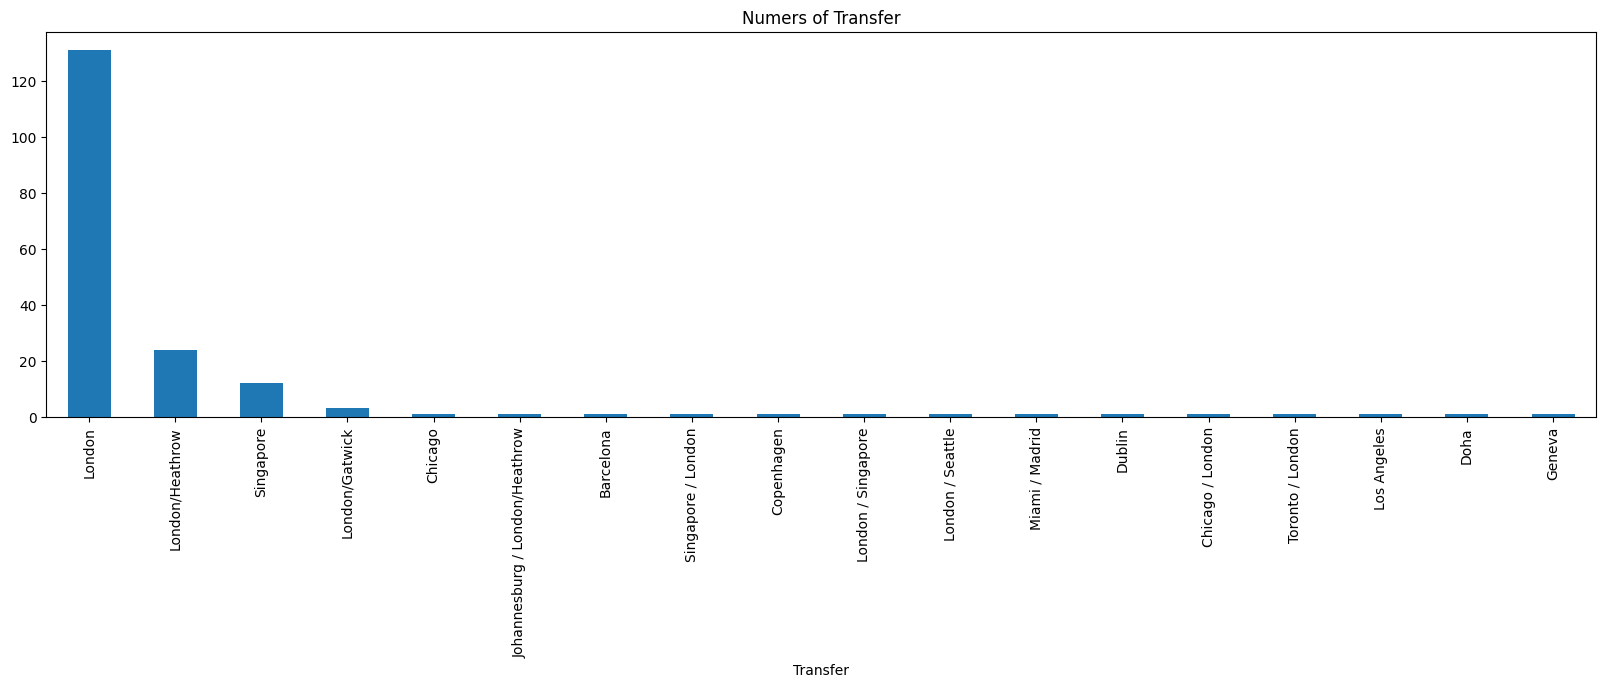

In [38]:
# Plotting a chart for the 'From' column
from_counts = df['From'].value_counts()
plt.figure(figsize=(100,20))
from_counts.plot(kind='bar')
plt.title('Numbers of From')
plt.show()

# Plotting a chart for the 'To' column
to_counts = df['To'].value_counts()
plt.figure(figsize=(100,20))
to_counts.plot(kind='bar')
plt.title('Numers of To')
plt.show()

# Plotting a chart for the 'Transfer' column
transfer_counts = df['Transfer'].value_counts()
plt.figure(figsize=(20,5))
transfer_counts.plot(kind='bar')
plt.title('Numers of Transfer')
plt.show()

## Data Analysis 3 - Seat Type Analysis

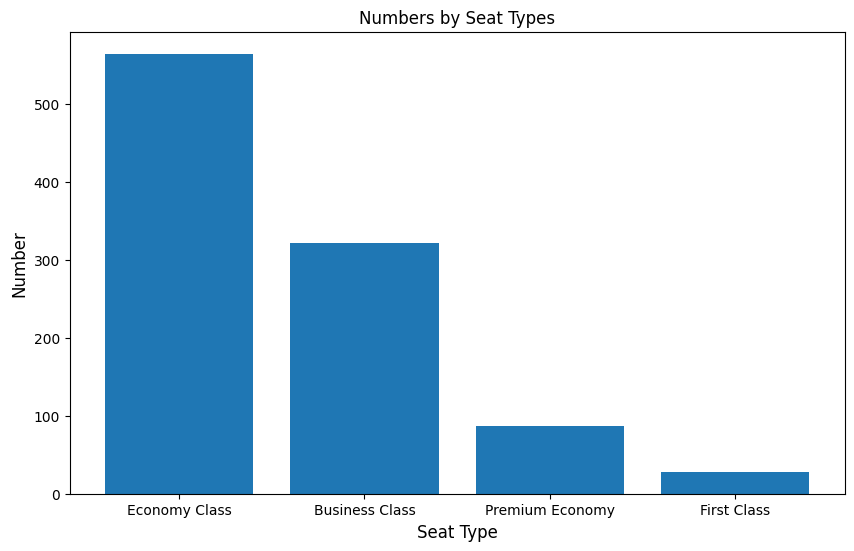

In [39]:
seat_type_counts = df['Seat_Type'].value_counts()

# Bar grafiğini oluşturun
plt.figure(figsize=(10,6))
plt.bar(seat_type_counts.index, seat_type_counts.values)

plt.title('Numbers by Seat Types')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Seat Type', fontsize=12)

plt.show()

## Data Analysis 4 - Correlation Analysis

In [40]:
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
count,915.000000,908.000000,788.000000,540.000000,943.000000,282.000000,1000.000000,1000.000000
mean,2.783607,3.205947,2.705584,2.803704,2.656416,2.248227,2.429000,4.183000
std,1.387327,1.525414,1.481652,1.471556,1.545035,1.528640,1.489019,3.321829
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [41]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()["Score"].sort_values()

Inflight_Entertainment    0.600830
Wifi_and_Connectivity     0.650293
Cabin_Staff_Service       0.712291
Seat_Comfort              0.722929
Food_and_Beverages        0.751700
Ground_Service            0.771129
Value_for_Money           0.892979
Score                     1.000000
Name: Score, dtype: float64

In [42]:
numeric_df.corr()

,Seat_Comfort,Cabin_Staff_Service,Food_and_Beverages,Inflight_Entertainment,Ground_Service,Wifi_and_Connectivity,Value_for_Money,Score
Seat_Comfort,1.000000,0.618383,0.640543,0.625187,0.560622,0.615856,0.702563,0.722929
Cabin_Staff_Service,0.618383,1.000000,0.730259,0.501159,0.562361,0.531734,0.672290,0.712291
Food_and_Beverages,0.640543,0.730259,1.000000,0.623948,0.549149,0.586204,0.709928,0.751700
Inflight_Entertainment,0.625187,0.501159,0.623948,1.000000,0.461177,0.674610,0.582196,0.600830
Ground_Service,0.560622,0.562361,0.549149,0.461177,1.000000,0.550492,0.712332,0.771129
Wifi_and_Connectivity,0.615856,0.531734,0.586204,0.674610,0.550492,1.000000,0.665344,0.650293
Value_for_Money,0.702563,0.672290,0.709928,0.582196,0.712332,0.665344,1.000000,0.892979
Score,0.722929,0.712291,0.751700,0.600830,0.771129,0.650293,0.892979,1.000000
